<a href="https://colab.research.google.com/github/hritic/Machine-learning/blob/main/KNN_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
url = "/content/drive/MyDrive/Colab Notebooks/Lab 6/haberman.csv"
names = ['Age', 'Year operation', 'Axillary nodes detected', 'Survival_status']
dataset = pd.read_csv(url, names=names)
print("Shape of the data:")
print(dataset.shape)
print("\nData Type:")
print(type(dataset))
print("\nFirst 10 rows:")
print(dataset.head(10))


Shape of the data:
(306, 4)

Data Type:
<class 'pandas.core.frame.DataFrame'>

First 10 rows:
   Age  Year operation  Axillary nodes detected  Survival_status
0   30              64                        1                1
1   30              62                        3                1
2   30              65                        0                1
3   31              59                        2                1
4   31              65                        4                1
5   33              58                       10                1
6   33              60                        0                1
7   34              59                        0                2
8   34              66                        9                2
9   34              58                       30                1


Classify Survival status
1. Implement KNN without using library function.
2. Split Train Test as 80% and 20%.
3. Set Random state as 4.
4. Get optimum K value with minimum error.
5. Show Confusion matrix and classification report.

In [ ]:
X = dataset.drop('Survival_status', axis=1)
y = dataset.Survival_status

To implement the KNN consider the following steps
1. first we calculate the distance between 2 rows.
2. get the nearset neighbours of that particular data
3. make predictions.

In [ ]:
#calculate euclidean distance
import numpy as np
def dis(row1, row2, p):
  dis = 0.0
  for i in range(len(row1)):
    dis += abs(row1[i] - row2[i])**p
  return dis**(1/p)

split the data in 80:20 train:test ratio.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
                                                   random_state=4)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

implementation of knn

In [ ]:
#implementation of knn with variable K value and different variable way to measure distance
def knn(X_train, X_test, y_train, y_test, k, p):
    
    # Counter to help with label voting
    from collections import Counter
    
    # Make predictions on the test data
    # Need output of 1 prediction per test data point
    y_pred = []

    for test_point in X_test:
        distances = []

        for train_point in X_train:
            distance = dis(test_point, train_point, p=p)
            distances.append(distance)
        
        # Store distances in a dataframe
        df_dists = pd.DataFrame(data=distances, columns=['dist'], 
                                index=y_train.index)
        
        # Sort distances, and only consider the k closest points
        df_nn = df_dists.sort_values(by=['dist'], axis=0)[:k]

        # Create counter object to track the labels of k closest neighbors
        counter = Counter(y_train[df_nn.index])

        # Get most common label of all the nearest neighbors
        prediction = counter.most_common()[0][0]
        
        # Append prediction to output list
        y_pred.append(prediction)
        
    return y_pred


# Make predictions on test dataset
#Using K value 5 and taking Euclidean distance in account
y_pred = knn(X_train, X_test, y_train, y_test, k=5, p=2)

print(y_pred)

[1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1]


to get a optimal K value to lower error value in range 1 to 50. Using Euclidean distance

In [ ]:
from sklearn.metrics import accuracy_score
#import matplotlib.pyplot as plt
accuracies = []

for k in range(1,50):
    y_pred = knn(X_train, X_test, y_train, y_test, k, p=2)
    accuracies.append(accuracy_score(y_test, y_pred))
#get k value for maximum accuracy
k_opt = np.argmax(accuracies)
print(k_opt)

17


confusion matrix and classification report

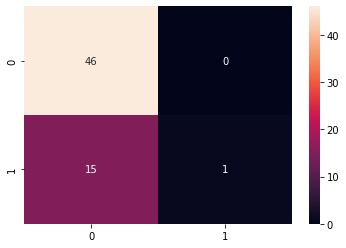

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.75      1.00      0.86        46
           2       1.00      0.06      0.12        16

    accuracy                           0.76        62
   macro avg       0.88      0.53      0.49        62
weighted avg       0.82      0.76      0.67        62

